## Soal Ujian Python for Machine Learning.

**Hotel Reservation Cancellation Prediction**

Anda adalah Data Scientist di sebuah perusahaan hotel. Anda diberikan dataset berisi informasi pemesanan kamar hotel (booking information) baik untuk hotel kota (city hotel) maupun hotel resort. Dataset ini juga mengandung kapan booking dilakukan, lama menginap, jumlah pengunjung dewasa, anak-anak, dan/atau bayi, serta ketersediaan tempat parkir.

Pertama tama lakukan Import Libraries, untuk memasukkan semua libraries yang di butuhkan dalam notebook ini.

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

Selanjutnya akan di lakukan Load data menggunakan `pd.read_csv` pada data ***hotel_bookings.csv***, seperti proses di bawah ini :

### OVERVIEW

In [2]:
df = pd.read_csv('hotel_bookings.csv')[0:3000]

Sesuai kesepakatan, dalam ujian ini data dibatasi hanya sebanyak 3000 data, sehingga mempercepat dan mempermudah proses dalam Machine Learning. Selanjutnya di bawah ini akan di tampilkan ***head***, yaitu 5 data teratas, dan ***tail***, yaitu 5 data terakhir, sehingga kita dapat memiliki gambaran terhadap keseluruhan data pada dataset ini.

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2997,Resort Hotel,0,36,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,73.2,1,0,Check-Out,2015-11-15
2998,Resort Hotel,0,0,2015,November,46,11,0,1,2,...,No Deposit,NaN,NaN,0,Transient,79.0,1,0,Check-Out,2015-11-12
2999,Resort Hotel,0,6,2015,November,46,11,0,1,1,...,No Deposit,96.0,NaN,0,Transient,37.0,1,0,Check-Out,2015-11-12


Setelah itu, kita lalukan check info dan describe data, sehingga kita dapat mengetahui informasi lebih lanjut mengenai seluruh data pada variable yang ada pada dataset ini. 

Melalui `df.info`, kita akan mendapatkan gambaran umum terhadap suatu dataset, dalam hal ini seperti yang di tunjukkan di bawah, dataset kita memiliki index sebanyak 3000 index, terdiri dari index 0 sampai index 2999. Artinya sudah sesuai dengan kesepakatan awal tadi. 

Selanjutnya pada ***Columns***, kita juga bisa melihat nama - nama variable dari data kita. Pada kolom ***Non-Null Count***, kita dapat melihat berapa value yang terisi pada data kita, sehingga dari informasi di bawah ini kita juga secara implisit dapat mengetahui jumlah berapa missing values dari data ini per variable nya, dengan cara jumlah entri data dikurangi Non Null Count, semisalnya pada column ***country***, kita dapat melihat bahwa ada 2999 Non Null Count dari 3000 entri, sehingga kita dapat memastikan bahwa pada column ini terdapat 1 missing value. Ini juga berlaku pada variable yang lain pada dataset ini. 

Selain itu, melalui info kita juga dapat melihat type data dari masing - masing variable. Hal ini dapat di lihat dari ***Dtype***, type data ini perlu kita periksa lagi lebih lanjut sebab tidak jarang pada beberapa kasus ditemui beberapa type data yang berbeda dari maksud variable nya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           3000 non-null   object 
 1   is_canceled                     3000 non-null   int64  
 2   lead_time                       3000 non-null   int64  
 3   arrival_date_year               3000 non-null   int64  
 4   arrival_date_month              3000 non-null   object 
 5   arrival_date_week_number        3000 non-null   int64  
 6   arrival_date_day_of_month       3000 non-null   int64  
 7   stays_in_weekend_nights         3000 non-null   int64  
 8   stays_in_week_nights            3000 non-null   int64  
 9   adults                          3000 non-null   int64  
 10  children                        3000 non-null   float64
 11  babies                          3000 non-null   int64  
 12  meal                            30

Selanjutnya kita melakukan proses describe dengan `df.describe` seperti di bawah ini. Walaupun memang banyak data yang masih belum jelas, kemungkinan hal ini terjadi karena memang banyak data yang sifatnya ***Labelling***(akan dibahas pada proses machine learning nanti). Tetapi hal ini perlu dilakukan untuk mengetahui gambaran secara umum terhadap suatu data, misalnya : 

Melalui kolom ***mean***, kita mengetahui nilai rata - rata yang ada dalam variable tersebut, ***std*** untuk mengetahui standar deviasi atau sebaran dalam variable tersebut, ***min***  untuk mengetahui nilai minimum, sedangkan ***max*** untuk nilai maksimum nya. 

Sedangkan 25%, 50%, dan 75% mengacu pada Quantile 1, Quantile 2 (median atau nilai tengah suatu data), dan Quantile 3. Quantile sederhananya adalah pengukuran posisi pada suatu data, dimana posisi quantile tersebut menunjukkan di mana proporsi tertentu dari distribusi data. Misalnya, pada quantile 2 (50%) adalah posisi tengah data, sehingga setengah dari data memiliki nilai kurang quantile 2, dan setengahnya memiliki nilai yang lebih. Demikian pula, 25% dari data yang memiliki nilai kurang dari quantile 1 dan 75% dari data yang memiliki nilai kurang dari quantile 3.

Sehingga misalkan saja kita ambil contoh variable ***lead_time*** pada contoh dibawah ini :

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,3000.0,0.354333,0.478391,0.0,0.00,0.00,1.00,1.00
lead_time,3000.0,63.740667,61.241921,0.0,20.00,52.00,90.00,737.00
arrival_date_year,3000.0,2015.000000,0.000000,2015.0,2015.00,2015.00,2015.00,2015.00
arrival_date_week_number,3000.0,35.939000,5.616327,27.0,31.00,36.00,41.00,46.00
arrival_date_day_of_month,3000.0,15.072333,9.113952,1.0,7.00,14.00,23.00,31.00
stays_in_weekend_nights,3000.0,1.316000,1.150037,0.0,0.00,1.00,2.00,13.00
stays_in_week_nights,3000.0,3.496000,2.394555,0.0,2.00,3.00,5.00,33.00
adults,3000.0,2.033000,1.992796,0.0,2.00,2.00,2.00,55.00
children,3000.0,0.139000,0.493045,0.0,0.00,0.00,0.00,10.00
babies,3000.0,0.019667,0.141256,0.0,0.00,0.00,0.00,2.00


Berdasarkan definisi, ***lead_time*** yang dimaksud dalam data ini adalah periode waktu (hari) antara pemesanan / booking yang di lakukan pelanggan dan waktu pesanan itu diselesaikan / pelanggan datang. Sehingga kita dapat mengatakan bahwa dari sebanyak 3000 pesanan. Rata-rata (mean) berada di 63 hari, dengan standar deviasi 61 hari. Sehingga rentang sebaran dari lead_time ini adalah sekitar 2 hari (mean - std) sampai 124 hari (mean + std). Sedangkan lead_time minimal 0 hari, atau pada hari itu juga pelanggan reservasi. Q1: 20 hari, Q2: 52 hari, Q3: 90 hari, dan maksimal pada 737 hari atau mungkin sekitar 2 tahun sebelumnya.

In [7]:
df.describe(include='object').T

,count,unique,top,freq
hotel,3000,1,Resort Hotel,3000
arrival_date_month,3000,5,July,842
meal,3000,4,BB,2333
country,2999,53,PRT,1775
market_segment,3000,6,Online TA,1478
distribution_channel,3000,3,TA/TO,2188
reserved_room_type,3000,8,A,1678
assigned_room_type,3000,9,A,1301
deposit_type,3000,3,No Deposit,2878
customer_type,3000,4,Transient,2465


Pada proses di atas kita melakukan describe sama saja seperti sebelumnya hanya ini untuk tipe data categorical. Dimana pada dasarnya banyak data tipe categorical yang masuk ke dalam describe sebelumnya karena proses Labeling. ***Unique*** menggambarkan nilai yang berbeda untuk setiap variablenya, ***top*** merupakan data teratas pada dataset untuk variable tersebut, sedangkan ***freq*** menunjukkan frekuensi atau seberapa sering nilai tersebut muncul ada pada variable.

In [8]:
pd.DataFrame({'Variables/ Columns' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique(), 
              'uniqueSample' : [list(df[i].drop_duplicates().sample(1))for i in df.columns]}).reset_index(drop = True)

,Variables/ Columns,dataType,null,unique,uniqueSample
0,hotel,object,0,1,[Resort Hotel]
1,is_canceled,int64,0,2,[0]
2,lead_time,int64,0,229,[93]
3,arrival_date_year,int64,0,1,[2015]
4,arrival_date_month,object,0,5,[October]
5,arrival_date_week_number,int64,0,20,[31]
6,arrival_date_day_of_month,int64,0,31,[13]
7,stays_in_weekend_nights,int64,0,10,[3]
8,stays_in_week_nights,int64,0,18,[5]
9,adults,int64,0,14,[6]


Sebelum memulai proses EDA, perlu dilakukan pembersihan dan persiapan data. Untuk itu dalam proses di atas, kita melakukan pemeriksaan terhadap seluruh data type variable, sehingga pada akhirnya kita memastikan bahwa seluruh variable sudah terisi sesuai dengan maksud variablenya. Selain itu kita juga perlu melihat ***null values*** pada setiap variable dan memastikan bahwa nilai yang kosong itu apakah termasuk ke dalam **MCAR, MAR atau MNAR** sehingga kita dapat lebih hati - hati dalam melakukan pembersihan data. 

MCAR (Missing Completely at Random) atau data yang hilang tetapi tidak terkait dengan suatu variable, sehingga untuk kebanyakan kasus hal ini terjadi karena error, bisa human error atau corrupt pada data. MAR (Missing at Random) data yang hilang kemungkinan besar terkait dengan variablenya, atau biasanya dalam proses sampling / pengumpulan data, responden sengaja tidak menjawab pertanyaan untuk variable ini, entah mungkin karena memang privasi atau hal lain, sehingga nilainya menjadi kosong. Sedangkan MNAR (Missing Not at Random) merupakan data yang hilang memang bukan karena error atau terkait dengan variable tertentu seperti pada MCAR atau MAR. Terjadinya missing data pada suatu variabel berkaitan dengan variabel itu sendiri, sehingga ini tidak bisa diprediksi dari variabel lain pada suatu dataset. Data yang hilang pada hal ini memang bisa jadi adalah nilai dari suatu data (value = Null).

### PREPROCESSING

Pertama - tama dalam proses ini kita akan melihat kembali mana data yang akan kita bersihkan, yang memiliki missing data dan juga tipe data yang bermasalah.

In [9]:
pd.DataFrame({'Variables' : df[['country', 'agent', 'company']].columns, 
              'Data Type' : df[['country', 'agent', 'company']].dtypes, 
              'Null Values' : df[['country', 'agent', 'company']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,country,object,1
1,agent,float64,465
2,company,float64,2877


Dalam proses ini kita akan memulai dari variable ***country*** menggambarkan dari negara mana pemesan berasal. Tipe datanya categorical, sehingga sudah tepat.

In [10]:
df[df['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15


Sepertinya setelah melakukan pengamatan, pada variable ini yang terjadi adalah MCAR, sehingga bisa di lakukan dropping. Tetapi, ada baiknya kita mencoba mengisi variable ini misalnya dengan cara di bawah ini :

In [11]:
df['country'].value_counts().head()

PRT    1775
ESP     343
GBR     316
IRL     143
FRA      79
Name: country, dtype: int64

Disini kita melakukan `.value_counts()` pada variable ***country*** sehingga mendapatkan negara dengan hasil yang terbanyak. Lalu kita akan melakukan pengisian pada missing values berdasarkan hasil ini dan mencoba untuk menampilkan kembali data yang bermasalah tadi.

In [12]:
df['country'] = df['country'].fillna('PRT')

In [13]:
pd.DataFrame({'Variables' : df[['country', 'agent', 'company']].columns, 
              'Data Type' : df[['country', 'agent', 'company']].dtypes, 
              'Null Values' : df[['country', 'agent', 'company']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,country,object,0
1,agent,float64,465
2,company,float64,2877


Selanjutnya kita lakukan pengecekan pada variable berikutnya, yaitu ***agent***. Variable ini merepresentasikan dari agent mana pemesan melakukan pesanan. Seharusnya variable ini adalah categorical, sehingga tipe data pada variable ini mungkin akan kita lakukan penggantian juga.

In [14]:
df[df['agent'].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02


In [15]:
df[~df['agent'].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06


Sepertinya setelah melakukan inspeksi lebih lanjut dan mengacu pada defisini dari variable, kemungkinan besar missing value pada variable ini termasuk dalam kategori MNAR. Sehingga kemungkinan besar missing value pada variable ini memang terjadi akibat pemesan yang tidak mendaftar / memesan melalui agen, atau dengan kata lain pemesan melakukan pemesanan sendiri secara langsung. Sehingga menjadi wajar jika nilai yang ada pada variable ini adalah ***NaN***. Selanjutnya berdasarkan hal ini daripada membiarkan menjadi NaN, kita akan rubah menjadi nilai 0, lalu mengganti data type nya ke Object dengan meggunakan `.astpe()`

In [16]:
df['agent'] = df['agent'].fillna(0)
df['agent'] = df['agent'].astype('object')
print(df['agent'].dtype)

object


In [17]:
pd.DataFrame({'Variables' : df[['country', 'agent', 'company']].columns, 
              'Data Type' : df[['country', 'agent', 'company']].dtypes, 
              'Null Values' : df[['country', 'agent', 'company']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,country,object,0
1,agent,object,0
2,company,float64,2877


Setelah itu, proses kita lanjutkan ke variable ***company***. Yang apabila kita melihat secara sekilas, variable ini mungkin memiliki tipe missing values MNAR, sama seperti variable sebelumnya. Variable ini merepresentasikan dari perusahaan mana pemesan melakukan pesanan. Sama dengan sebelumnya, sehingga tipe data pada variable ini mungkin akan kita lakukan penggantian juga.

In [18]:
df[df['company'].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
df[~df['company'].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,0,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,0,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,0,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,...,No Deposit,0,110.0,0,Transient,104.72,1,1,Check-Out,2015-07-10
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,...,No Deposit,0,113.0,0,Transient,100.00,1,0,Check-Out,2015-07-13


In [20]:
df['company'].isna().value_counts()

True     2877
False     123
Name: company, dtype: int64

Apabila kita melihat polanya, memang benar missing value pada variable ini memang MNAR. Terlebih lagi di tunjukkan pada `.value_counts()`, terlalu banyak data yang termasuk ke missing values, sehingga dapat kita simpulkan memang missing values pada variable ini termasuk MNAR, dan bila kita interpretasikan nilai ini, maka kita mendapati ada sebanyak 123 kali pemesanan lewat atau atas nama perusahaan, sedangkan sisanya tidak. Sehingga kita akan melakukan teknis yang sama seperti variable sebelumnya.

In [21]:
df['company'] = df['company'].fillna(0)
df['company'] = df['company'].astype('object')
print(df['agent'].dtype)

object


In [22]:
pd.DataFrame({'Variables' : df[['country', 'agent', 'company']].columns, 
              'Data Type' : df[['country', 'agent', 'company']].dtypes, 
              'Null Values' : df[['country', 'agent', 'company']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,country,object,0
1,agent,object,0
2,company,object,0


Setelah semua data bersih, kita melanjutkan ke proses EDA.

### EDA

Pertama - tama kita akan mulai EDA melalui target variable dahulu, setelah itu kita lakukan EDA ke seluruh variablenya. Ini dilakukan untuk mengetahui gambaran umum dan pola dari pemesan sehingga tujuan awal dari ujian ini dapat tercapai.

In [23]:
cancel = df['is_canceled'].value_counts()[1]
no_cancel = df['is_canceled'].value_counts()[0]

print(f'TOTAL CANCEL : {cancel} |', f'TOTAL NO CANCEL : {no_cancel}')

TOTAL CANCEL : 1063 | TOTAL NO CANCEL : 1937


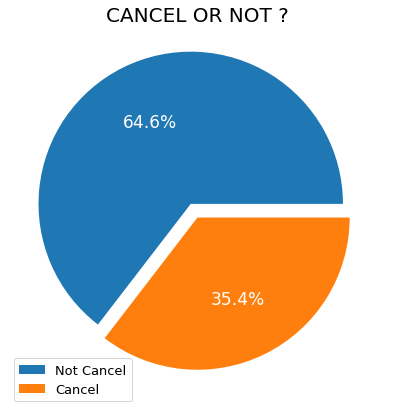

In [24]:
plt.figure(figsize = (8,7))
plt.title('CANCEL OR NOT ?', fontsize = 20)

labels = 'Not Cancel', 'Cancel'

plt.pie(df['is_canceled'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

Dari plot di atas kita dapat melihat bahwa dari total 3000 pesanan, ada 35.4% pesanan atau sekitar 1063 pesanan yang di cancel sehingga menyisakan 64.6% pesanan atau sekitar 1937 pesanan yang tidak di cancel.

In [25]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat = df_cat.drop(['hotel'], axis = 1)

In [26]:
df_cat.head()

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,0,0,Transient,Check-Out,2015-07-01
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,0,0,Transient,Check-Out,2015-07-01
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,0,0,Transient,Check-Out,2015-07-02
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,304,0,Transient,Check-Out,2015-07-02
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240,0,Transient,Check-Out,2015-07-03


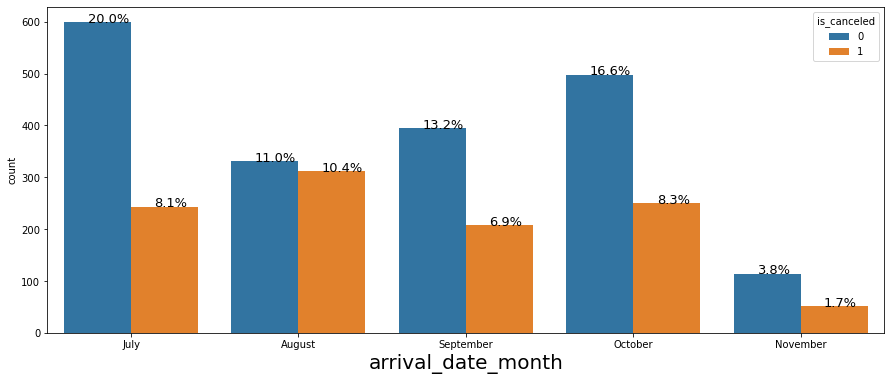

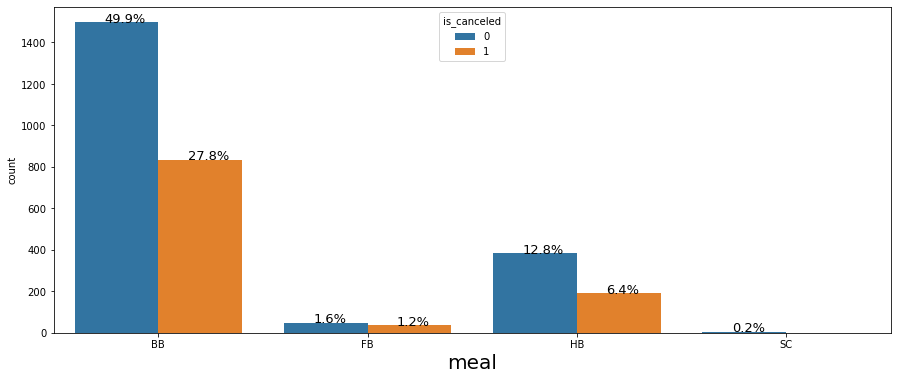

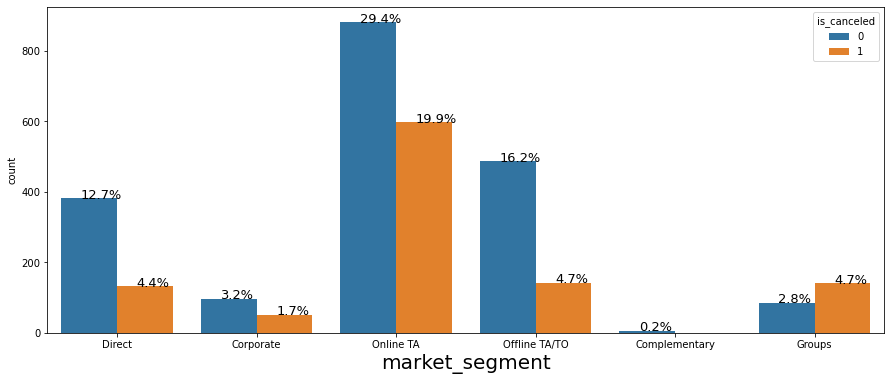

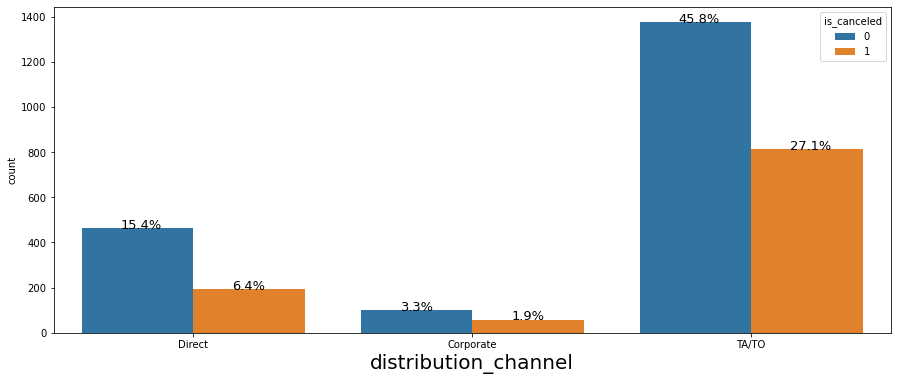

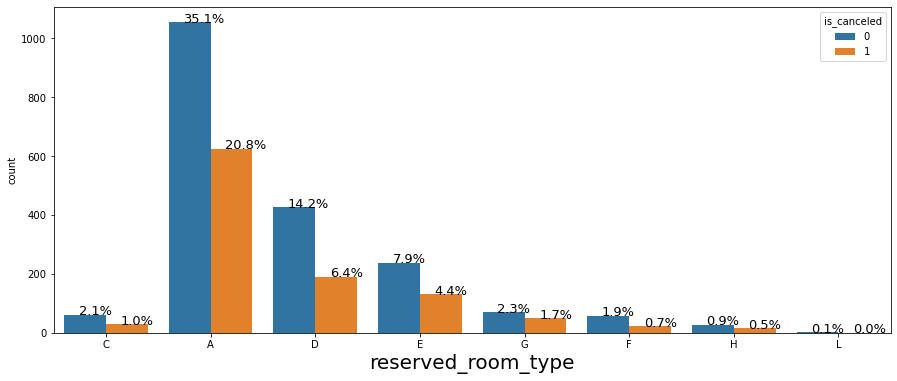

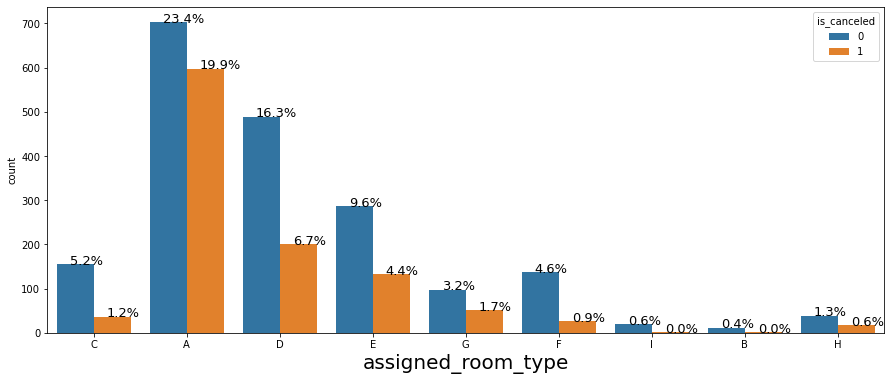

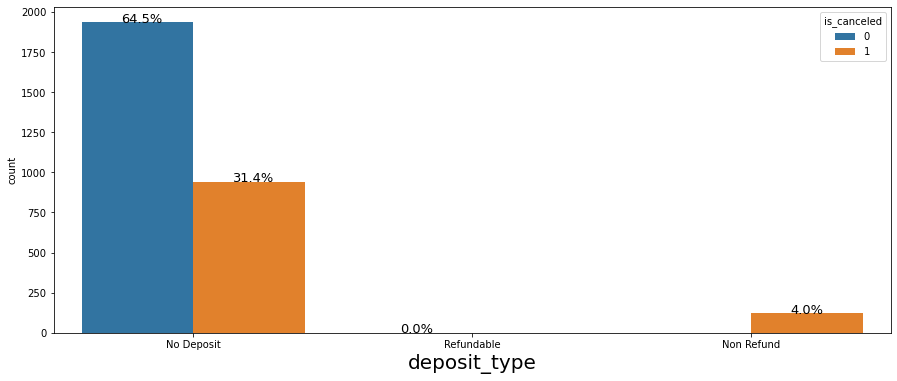

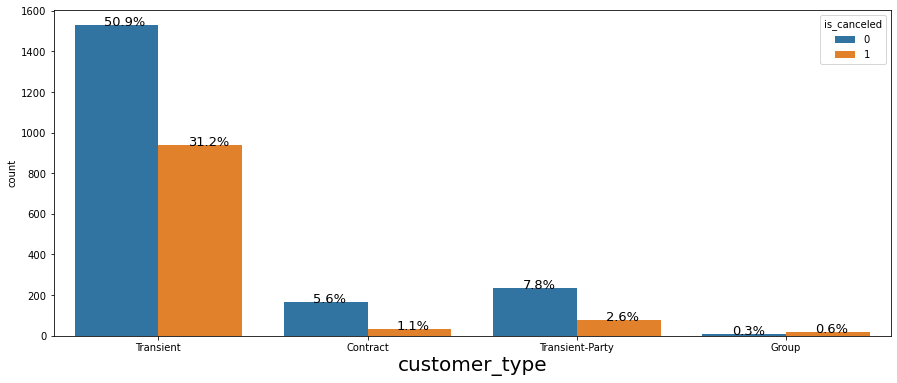

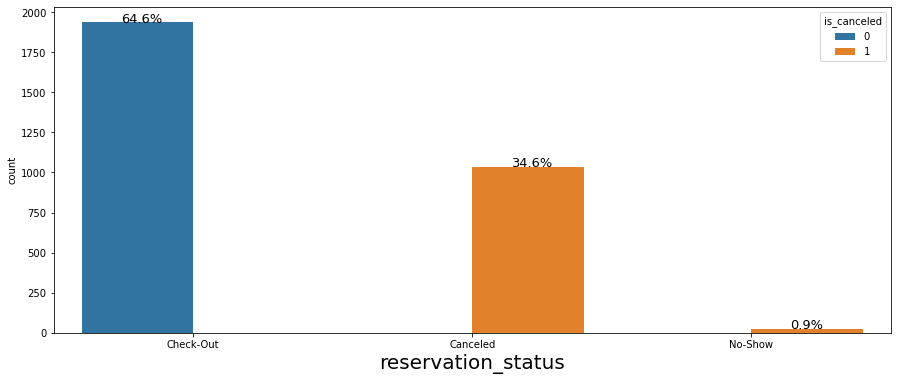

In [27]:
for col in df_cat.drop(columns=['country', 'agent', 'company', 'reservation_status_date']):
    plt.figure(figsize = (15,6))
    ax = sns.countplot(x = col, data = df, hue = 'is_canceled')
     
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.1f}%'.format(100 * val.get_height()/total)
        xpos = val.get_x() + 0.14
        ypos = val.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(col, fontsize = 20)    
    plt.show()

Berdasarkan plot di atas kita dapat mengetahui beberapa hal, diantaranya : 

- 1. Jumlah kedatangan terbanyak ada di bulan JULY dengan 20% dari total kedatangan, dan hanya 8.1% yang melakukan pembatalan.
- 2. Tipe makanan yang sering dipesan adalah tipe BB (Bed & Breakfast) dengan total pemesanan sebanyak 49%.
- 3. Segmentasi dari pesanan yang di pesan kebanyakan adalah melalui Online dengan 29.4%, namun sisa di katergori ini menyumbang sebanyak 19.9% pembatalan.
- 4. Channel distribusi kebanyakan melalui Travel agent.
- 5. Tipe ruangan yang di reservasi kebanyakan tipe A dengan total 35% dari total semua pemesanan, dengan 20% pembatalan.
- 6. Tipe ruangan yang di berikan kebanyakan juga tipe A, sebanyak 23%, dan sisanya 19% di batalkan.
- 7. Sebagian besar dari pemesan tidak melakukan jaminan deposit (64%).
- 8. Tipe booking yang terbanyak adalah Transient, yaitu ketika booking ini dilakukan mandiri.
- 9. Dari total semua status reservasi, ada 64% yang selesai dengan check out, 34.6% di batalkan dan sisanya tidak hadir.

In [28]:
df_con = df.loc[:, df.dtypes != np.object]

In [29]:
df_con

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,2015,46,10,0,5,2,0.0,0,0,0,0,0,0,47.7,0,0
2996,1,39,2015,46,10,0,5,1,0.0,0,0,0,0,0,0,40.0,0,0
2997,0,36,2015,46,10,0,5,2,1.0,0,0,0,0,2,0,73.2,1,0
2998,0,0,2015,46,11,0,1,2,0.0,0,0,0,0,0,0,79.0,1,0


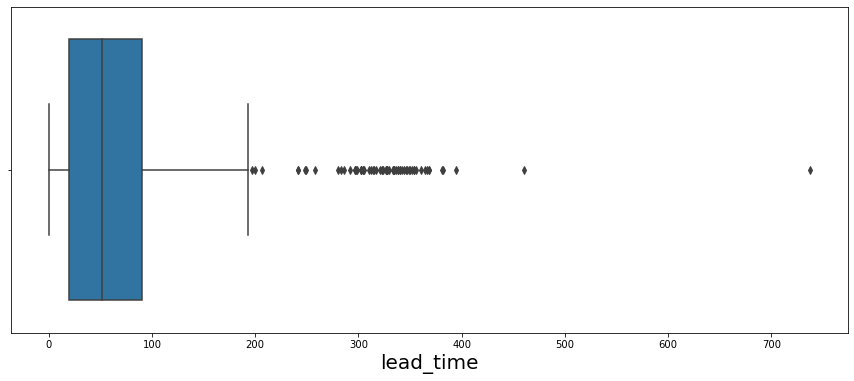

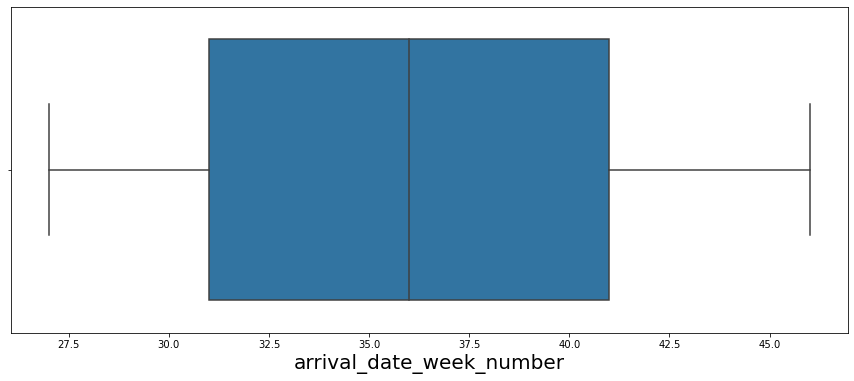

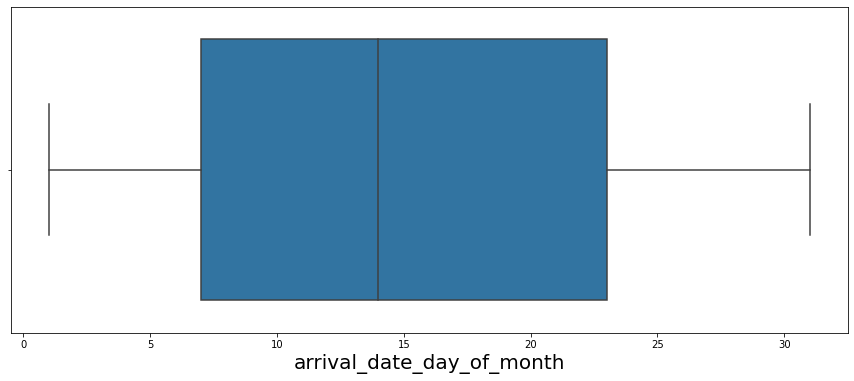

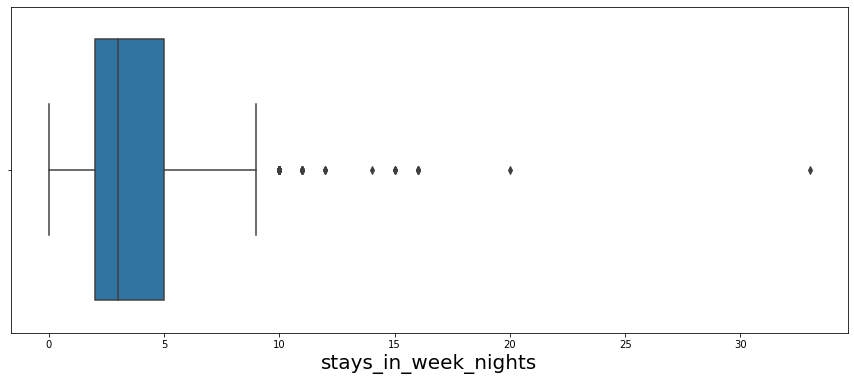

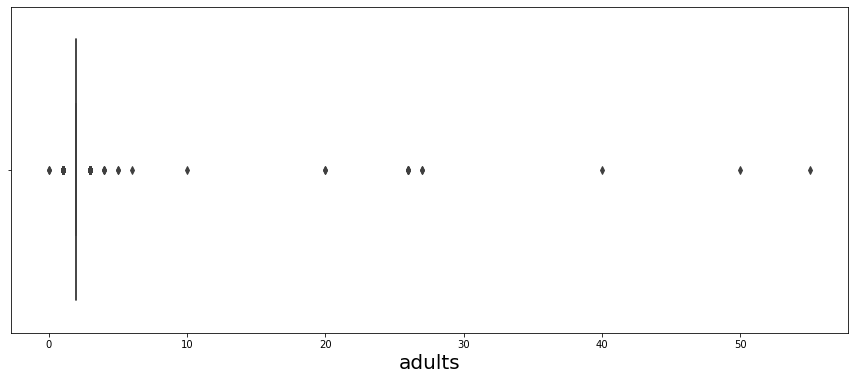

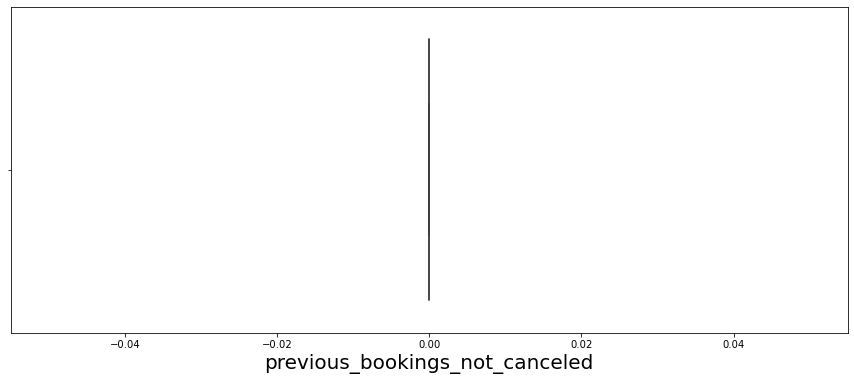

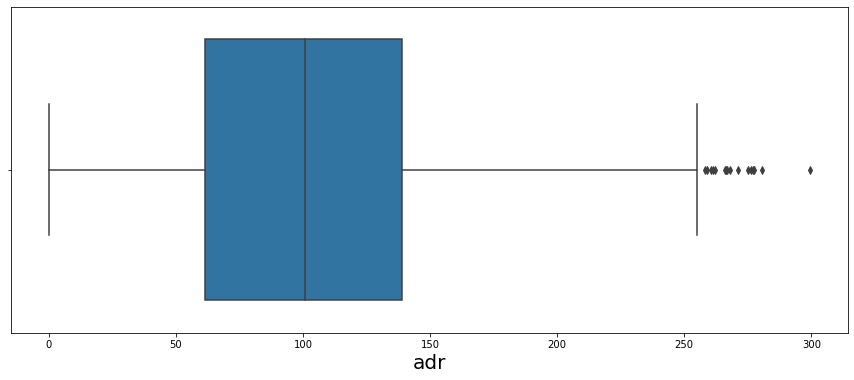

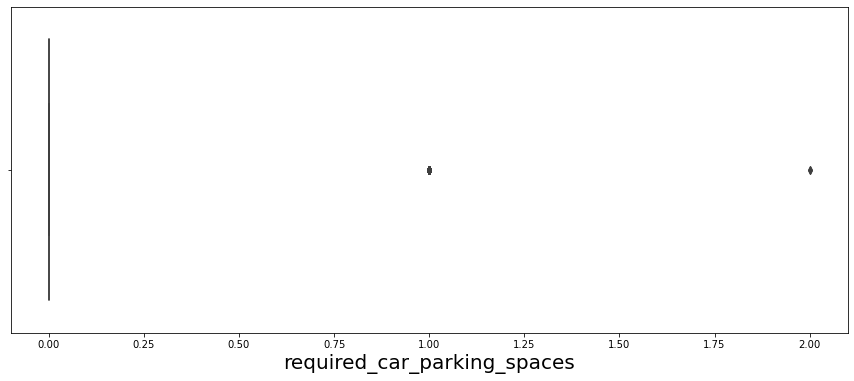

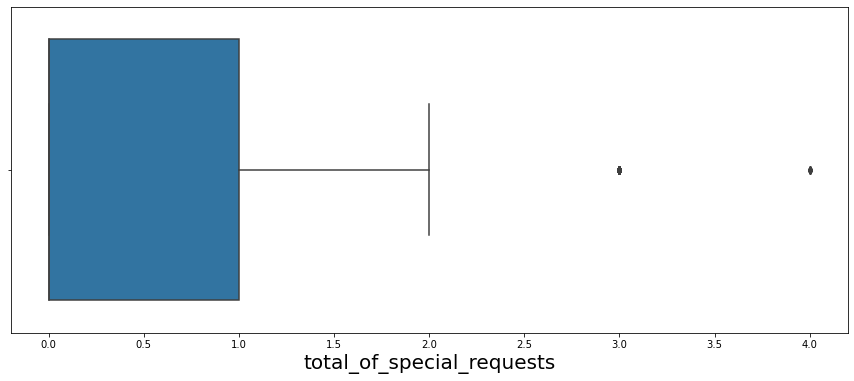

In [30]:
for col in df_con.drop(columns=['is_canceled', 'arrival_date_year', 'stays_in_weekend_nights', 'children', 'babies', 
                                'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list']):
    plt.figure(figsize = (15,6))
    ax = sns.boxplot(x = col, data = df)
    
    plt.xlabel(col, fontsize = 20)    
    plt.show()

Berdasarkan boxplot, ditemukan beberapa variable yang memiliki rentang outlier atau nilai ekstrim yang cukup jauh. Perlu diketahui juga nanti apabila variable ini akan di pertahankan dalam proses prediksi, maka kemungkinan besar akan dilakukan menggunakan Robust Scaler, sehingga data akan lebih kuat terhadap pengaruh outlier. Namun jika di perhatikan, nilai outlier yang ada pada variable - variable tersebut dirasa sangat wajar jika di kaitkan dengan definisi variable, misalnya saja total of special request, yang mengartikan jumlah request khusus yang di pesan oleh pemesan, maksimal memang 2 tetapi wajar jika ada beberapa orang yang memesan dengan jumlah 3 atau 4 pesanan. Sehingga dalam proces machine learning dirasa tidak perlu untuk di scaling.

### Model Building & Hyper-parameter Tuning

Pertama - tama lakukan Feature Selection untuk mendapatkan feature yang terbaik untuk modelling.

In [31]:
correlation=df.corr()['is_canceled']
correlation.abs().sort_values(ascending=False)

is_canceled                       1.000000
required_car_parking_spaces       0.287221
lead_time                         0.209572
booking_changes                   0.128840
adr                               0.096483
adults                            0.075522
days_in_waiting_list              0.063667
total_of_special_requests         0.059307
arrival_date_day_of_month         0.051248
stays_in_week_nights              0.045046
children                          0.035686
stays_in_weekend_nights           0.020056
babies                            0.014338
arrival_date_week_number          0.010033
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: is_canceled, dtype: float64

Selanjutnya, sebelum melakukan building / fitting model, kita akan lakukan Labeling terlebih dahulu agar dapat terbaca oleh model.

In [32]:
labelencoder=LabelEncoder()

df['meal']=labelencoder.fit_transform(df['meal'])
df['country']=labelencoder.fit_transform(df['country'])
df['market_segment']=labelencoder.fit_transform(df['market_segment'])
df['distribution_channel']=labelencoder.fit_transform(df['distribution_channel'])
df['reserved_room_type']=labelencoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type']=labelencoder.fit_transform(df['assigned_room_type'])
df['deposit_type']=labelencoder.fit_transform(df['deposit_type'])
df['customer_type']=labelencoder.fit_transform(df['customer_type'])
df['reservation_status']=labelencoder.fit_transform(df['reservation_status'])
df['reservation_status_date']=labelencoder.fit_transform(df['reservation_status_date'])

Lalu kita drop variable yang tidak termasuk ke dalam feature selection tadi.

In [33]:
cols = ['is_repeated_guest','stays_in_weekend_nights','adr','arrival_date_month','arrival_date_day_of_month','children',
       'arrival_date_year','arrival_date_week_number','stays_in_week_nights','reservation_status', 'hotel']
df = df.drop(cols,axis=1)

In [34]:
df.head()

,is_canceled,lead_time,adults,babies,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,342,2,0,0,40,2,1,0,0,...,2,3,0,0,0,0,2,0,0,75
1,0,737,2,0,0,40,2,1,0,0,...,2,4,0,0,0,0,2,0,0,75
2,0,7,1,0,0,23,2,1,0,0,...,2,0,0,0,0,0,2,0,0,76
3,0,13,1,0,0,23,1,0,0,0,...,0,0,0,304,0,0,2,0,0,76
4,0,14,2,0,0,23,5,2,0,0,...,0,0,0,240,0,0,2,0,1,77


#### PARAMETER 

In [35]:
#LogRegression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [10, 100]
LRG_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter}

In [36]:
#Random Forest
max_depth = [10, 20, 40, 'None']
min_samples_leaf = [2, 4]
min_samples_split = [2, 10]
n_estimators = [10, 100]

RFC_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [37]:
#KNN
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p=[1,2]

KNN_param = {'leaf_size' : leaf_size, 'n_neighbors' : n_neighbors, 'p' : p}

### MODEL BUILDING

#### SPLIT DATA - FITTING - HYPER 

Dibawah ini kita akan mulai melakukan Splitting data ke train dan test, lalu melakukan fitting model dan mencoba hyperparameter.

In [38]:
x = df.drop(['is_canceled'],axis=1).values
y = df['is_canceled'].values

#### SPLIT DATA

In [39]:
#Split train data 80%, test data 20%
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, shuffle = False)

#Model
LRG = LogisticRegression().fit(x_train, y_train)
RFC = RandomForestClassifier().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)

#### HYPERPARAMETER TUNING

In [40]:
# Hyper
RSCV_LRG = RandomizedSearchCV(estimator = LRG, param_distributions = LRG_param, cv=5).fit(x_train, y_train)
RSCV_RFC = RandomizedSearchCV(estimator = RFC, param_distributions = RFC_param, cv=5).fit(x_train, y_train)
RSCV_KNN = RandomizedSearchCV(estimator = KNN, param_distributions = KNN_param, cv=5).fit(x_train, y_train)

Berikut adalah hasil hyperparameter dengan Randomized Search Cross Validation, yang nantinya akan dibandingkan dengan model yang tanpa hyper parameter untuk mengetahui hasilnya.

In [41]:
print('best param LRG : ' ,RSCV_LRG.best_params_)
print('best param RFC : ' ,RSCV_RFC.best_params_)
print('best param KNN : ' ,RSCV_KNN.best_params_)

best param LRG :  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100}
best param RFC :  {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}
best param KNN :  {'p': 1, 'n_neighbors': 6, 'leaf_size': 25}


In [42]:
LRG_best = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 1000).fit(x_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 4, max_depth = 20).fit(x_train, y_train)
KNN_best = KNeighborsClassifier(p = 1, n_neighbors = 16, leaf_size = 30).fit(x_train, y_train)

#### MODEL EVALUATION

Berikut adalah evaluasi model dengan menggunakan hyperparameter dan tanpa hyperparameter.

In [43]:
LRG_score = LRG.score(x_test,y_test)
RFC_score = RFC.score(x_test,y_test)
KNN_score = KNN.score(x_test,y_test)
LRG_best_score = LRG_best.score(x_test,y_test)
RFC_best_score = RFC_best.score(x_test,y_test)
KNN_best_score = KNN_best.score(x_test,y_test)

In [57]:
LRG_score1 = LRG.score(x_train,y_train)
RFC_score1 = RFC.score(x_train,y_train)
KNN_score1 = KNN.score(x_train,y_train)
LRG_best_score1 = LRG_best.score(x_train,y_train)
RFC_best_score1 = RFC_best.score(x_train,y_train)
KNN_best_score1 = KNN_best.score(x_train,y_train)

In [44]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
              'Normal': [LRG_score, RFC_score, KNN_score], 
              'Hyper' : [LRG_best_score, RFC_best_score, KNN_best_score]})

,Model,Normal,Hyper
0,LogRegression,0.796667,0.788333
1,RandomForest,0.815000,0.843333
2,KNNeighbors,0.791667,0.790000


In [58]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
              'Normal': [LRG_score1, RFC_score1, KNN_score1], 
              'Hyper' : [LRG_best_score1, RFC_best_score1, KNN_best_score1]})

,Model,Normal,Hyper
0,LogRegression,0.826250,0.795000
1,RandomForest,0.999583,0.948333
2,KNNeighbors,0.895833,0.870000


Melalui hasil test tersebut dapat dilihat bahwa hasil dari train sangat jelas mengalami overfit, terutama pada Random Forest dan KNN, selain itu hyperparameter hanya unggul pada Model Random Forest, sehingga kita akan menggunakannya untuk predict dengan model ini saja, sisanya kita tidak akan menggunakan hyperparameter.

### PREDICT

In [45]:
#Logistic Regression
yp_LRG = LRG.predict(x_test)

#Random Forest
yp_RFC = RFC_best.predict(x_test)

#KNNeighbors
yp_KNN = KNN.predict(x_test)

### MODEL PREDICT

In [46]:
# lRG
cm_LRG = confusion_matrix(y_test, yp_LRG)

# RFC
cm_RFC = confusion_matrix(y_test, yp_RFC)

# KNN
cm_KNN = confusion_matrix(y_test, yp_KNN)

In [47]:
labels = ['Not Cancel', 'Cancel']

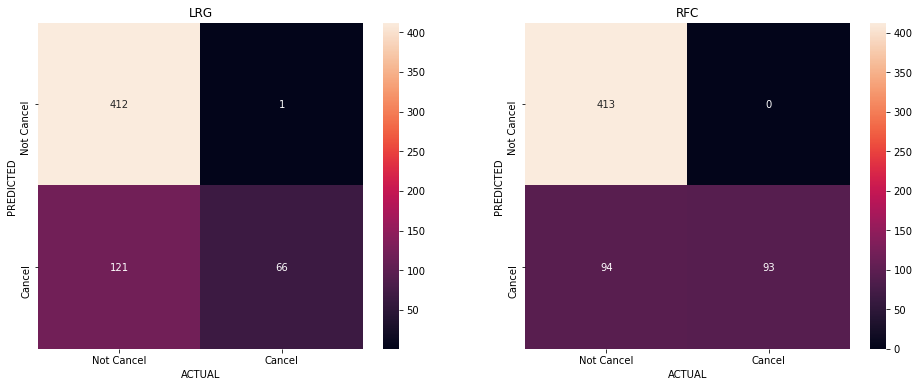

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('LRG'), ax2.set_title('RFC')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

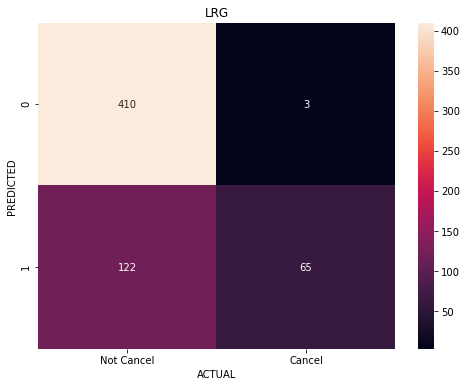

In [49]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax1)

ax1.xaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels)

ax1.set_title('LRG')
ax1.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED')

plt.show()

In [50]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

In [51]:
pd.concat([report_LRG, report_RFC, report_KNN], keys = ['Logistic Regression', 'Random Forest', 'KNN'])

precision    recall  f1-score     support
Logistic Regression Not Cancel     0.772983  0.997579  0.871036  413.000000
                    Cancel         0.985075  0.352941  0.519685  187.000000
                    accuracy       0.796667  0.796667  0.796667    0.796667
                    macro avg      0.879029  0.675260  0.695360  600.000000
                    weighted avg   0.839085  0.796667  0.761532  600.000000
Random Forest       Not Cancel     0.814596  1.000000  0.897826  413.000000
                    Cancel         1.000000  0.497326  0.664286  187.000000
                    accuracy       0.843333  0.843333  0.843333    0.843333
                    macro avg      0.907298  0.748663  0.781056  600.000000
                    weighted avg   0.872380  0.843333  0.825039  600.000000
KNN                 Not Cancel     0.770677  0.992736  0.867725  413.000000
                    Cancel         0.955882  0.347594  0.509804  187.000000
                    accuracy       0.791667  0.791667  0.791667    0.791667
                    macro avg      0.863280  0.670165  0.688764  600.000000
                    weighted avg   0.828399  0.791667  0.756173  600.000000

In [52]:
#Recall
LRG_pos_rec = recall_score(y_test, LRG.predict(x_test), pos_label = 1)
LRG_neg_rec = recall_score(y_test, LRG.predict(x_test), pos_label = 0)
RFC_pos_rec = recall_score(y_test, RFC.predict(x_test), pos_label = 1)
RFC_neg_rec = recall_score(y_test, RFC.predict(x_test), pos_label = 0)
KNN_pos_rec = recall_score(y_test, KNN.predict(x_test), pos_label = 1)
KNN_neg_rec = recall_score(y_test, KNN.predict(x_test), pos_label = 0)

#Precision
LRG_pos_prec = precision_score(y_test, LRG.predict(x_test), pos_label = 1)
LRG_neg_prec = precision_score(y_test, LRG.predict(x_test), pos_label = 0)
RFC_pos_prec = precision_score(y_test, RFC.predict(x_test), pos_label = 1)
RFC_neg_prec = precision_score(y_test, RFC.predict(x_test), pos_label = 0)
KNN_pos_prec = precision_score(y_test, KNN.predict(x_test), pos_label = 1)
KNN_neg_prec = precision_score(y_test, KNN.predict(x_test), pos_label = 0)

#F1 Score
LRG_pos_fsc = f1_score(y_test, LRG.predict(x_test), pos_label = 1)
LRG_neg_fsc = f1_score(y_test, LRG.predict(x_test), pos_label = 0)
RFC_pos_fsc = f1_score(y_test, RFC.predict(x_test), pos_label = 1)
RFC_neg_fsc = f1_score(y_test, RFC.predict(x_test), pos_label = 0)
KNN_pos_fsc = f1_score(y_test, KNN.predict(x_test), pos_label = 1)
KNN_neg_fsc = f1_score(y_test, KNN.predict(x_test), pos_label = 0)

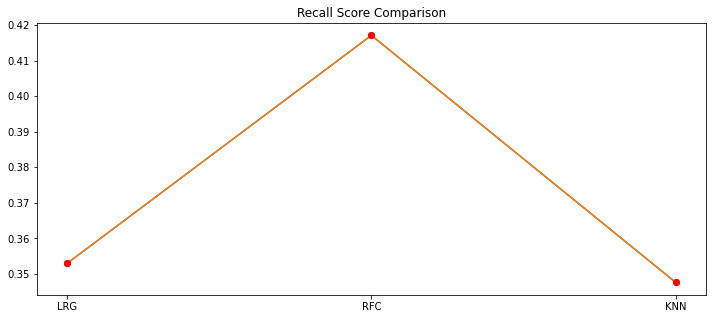

In [53]:
# Plotting Recall

plt.figure(figsize = (12, 5))
plt.title('Recall Score Comparison')
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_rec, RFC_pos_rec, KNN_pos_rec])
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_rec, RFC_pos_rec, KNN_pos_rec])

plt.plot([LRG_pos_rec, RFC_pos_rec, KNN_pos_rec], 'ro')
plt.plot([LRG_pos_rec, RFC_pos_rec, KNN_pos_rec], 'ro')
plt.show()

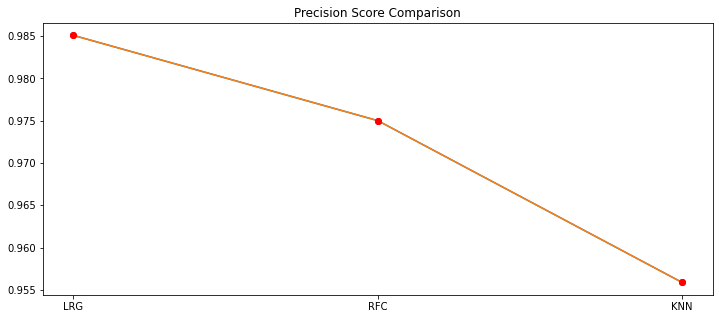

In [54]:
# Plotting Precision

plt.figure(figsize = (12, 5))
plt.title('Precision Score Comparison')
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_prec, RFC_pos_prec, KNN_pos_prec])
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_prec, RFC_pos_prec, KNN_pos_prec])

plt.plot([LRG_pos_prec, RFC_pos_prec, KNN_pos_prec], 'ro')
plt.plot([LRG_pos_prec, RFC_pos_prec, KNN_pos_prec], 'ro')
plt.show()

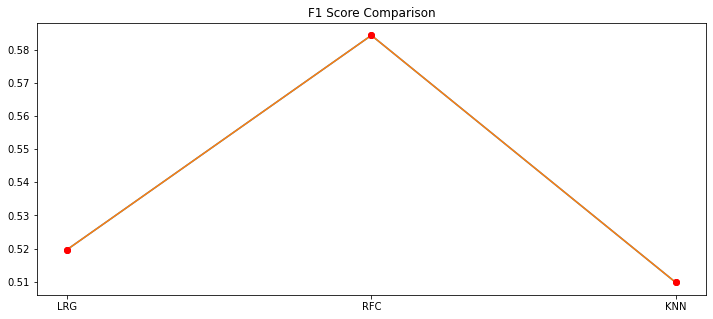

In [56]:
# Plotting F1 Score

plt.figure(figsize = (12, 5))
plt.title('F1 Score Comparison')
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_fsc, RFC_pos_fsc, KNN_pos_fsc])
plt.plot(['LRG', 'RFC', 'KNN'], [LRG_pos_fsc, RFC_pos_fsc, KNN_pos_fsc])

plt.plot([LRG_pos_fsc, RFC_pos_fsc, KNN_pos_fsc], 'ro')
plt.plot([LRG_pos_fsc, RFC_pos_fsc, KNN_pos_fsc], 'ro')
plt.show()

Setelah mengevalusi model dengan membandingkan dari ketiga model tersebut, berdasarkan plot diatas, dapat di katakan bahwa walaupun kalah pada precision, Random Forest memiliki Recall dan F1 Score yang paling tinggi daripada kedua model lainnya. Sehingga dapat kita katakan bahwa berdasarkan tiga model yang di evaluasi, dalam kasus ini Random Forest adalah merupakan model yang paling cocok untuk memprediksi. Recall diutamakan, karena impactnya lumayan besar untuk industri ini.